In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd

import requests
from bs4 import BeautifulSoup
import time

from matplotlib import pyplot as plt

# 한경 컨센서스 홈페이지 접속

In [2]:
chrome_driver = 'C:/Users/user/Python(Jupyter)/Big data/Crawling/chromedriver.exe'
driver = webdriver.Chrome(chrome_driver)
driver.get("http://consensus.hankyung.com/")

# 한경 컨센서스 기업 정보 검색

In [3]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
def Search_firm(firm):
    chrome_driver = 'C:/Users/user/Python(Jupyter)/Big data/Crawling/chromedriver.exe'
    driver = webdriver.Chrome(chrome_driver)
    df.index = df['회사명']
    subject_code = df.loc[firm]['종목코드']
    url = 'http://media.kisline.com/highlight/mainHighlight.nice?paper_stock={}&nav=1'.format(subject_code)
    driver.get(url)

In [4]:
Search_firm("삼성전자")

In [7]:
Search_firm("피엔케이피부임상연구센타")

# 기업 재무제표 검색 및 그래프 그리기

In [8]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
chrome_driver = 'C:/Users/user/Python(Jupyter)/Big data/Crawling/chromedriver.exe'
driver = webdriver.Chrome(chrome_driver)

class Finance_hangyung():
    
    financial = pd.DataFrame()
    
    def __init__(self, firm):
        self.firm = firm

    def Financial_analysis(self):
        df.index = df['회사명']
        subject_code = df.loc[self.firm]['종목코드']
        url = 'http://media.kisline.com/fininfo/mainFininfo.nice?paper_stock={}&nav=4'.format(subject_code)
        driver.get(url)
        src = driver.page_source
        soup = BeautifulSoup(src)
        lists = soup.select('#Fin0 > div > table > tbody > tr')
        cols = soup.select('#Fin0 > div > table > thead')
        col = cols[0].text.strip().split('\n')
        table = []
        for i in range(len(lists)):
            temp = lists[i].text.strip().replace("\t", "").split('\n')
            while len(temp) < 6:
                temp.append('')
            table.append(temp)
        Finance_hangyung.financial = pd.DataFrame(table, columns = col)
        Finance_hangyung.financial.index = Finance_hangyung.financial['주요재무비율']
        Finance_hangyung.financial.drop('주요재무비율', axis = 'columns', inplace = True)
        return Finance_hangyung.financial

    def Graph(self, column):
        self.column = column
        for i in range(len(Finance_hangyung.financial.loc[self.column])):
            Finance_hangyung.financial.loc[self.column][i] = float(Finance_hangyung.financial.loc[self.column][i])
        plt.plot(Finance_hangyung.financial.columns, Finance_hangyung.financial.loc[self.column])
        return plt.show()

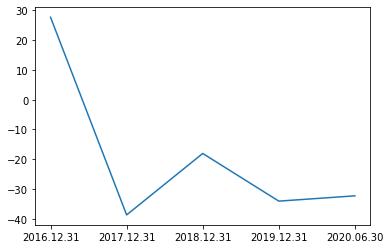

In [10]:
PK = Finance_hangyung('코오롱티슈진')
PK.Financial_analysis()
PK.Graph("총자본순이익율")

------------------------------------------------------------------------------------------------------------

# 연습공간

In [ ]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]    
chrome_driver = 'C:/Users/user/Python(Jupyter)/Big data/Crawling/chromedriver.exe'
driver = webdriver.Chrome(chrome_driver)

def Financial_analysis(firm):
    df.index = df['회사명']
    subject_code = df.loc[firm]['종목코드']
    url = 'http://media.kisline.com/fininfo/mainFininfo.nice?paper_stock={}&nav=4'.format(subject_code)
    driver.get(url)
    src = driver.page_source
    soup = BeautifulSoup(src)
    lists = soup.select('#Fin0 > div > table > tbody > tr')
    cols = soup.select('#Fin0 > div > table > thead')
    col = cols[0].text.strip().split('\n')
    table = []
    for i in range(len(lists)):
        temp = lists[i].text.strip().replace("\t", "").split('\n')
        while len(temp) < 6:
            temp.append('')
        table.append(temp)
    financial = pd.DataFrame(table, columns = col)
    financial.index = financial['주요재무비율']
    financial.drop('주요재무비율', axis = 'columns', inplace = True)
    return financial

def Graph(firm, column):
    financial = Financial_analysis(firm)
    for i in range(len(financial.loc[column])):
        financial.loc[column][i] = float(financial.loc[column][i])
    plt.plot(financial.columns, financial.loc[column])
    return plt.show()

In [46]:
lists = soup.select('#Fin0 > div > table > tbody > tr')
cols = soup.select('#Fin0 > div > table > thead')
col = cols[0].text.strip().split('\n')

['주요재무비율',
 '2016.12.31',
 '2017.12.31',
 '2018.12.31',
 '2019.12.31',
 '2020.06.30']

In [77]:
lists[1].text.strip().replace("\t", "").split('\n')

['총자본순이익율', '33.12', '30.15', '24.88', '23.57', '27.01']

In [78]:
lists = soup.select('#Fin0 > div > table > tbody > tr')
table = []
for i in range(len(lists)):
    temp = lists[i].text.strip().replace("\t", "").split('\n')
    while len(temp) < 6:
        temp.append('')
    table.append(temp)


In [88]:
financial = pd.DataFrame(table, columns = col)
financial

,주요재무비율,2016.12.31,2017.12.31,2018.12.31,2019.12.31,2020.06.30
0,수익성 비율,(%),,,,
1,총자본순이익율,33.12,30.15,24.88,23.57,27.01
2,자기자본순이익율,35.72,32.78,27.4,26.58,30.36
3,매출액법인세비용차감전순이익율,57.3,54.14,45.58,50.54,60.19
4,매출액순이익율,47.22,44.5,38.75,43.01,51.18
5,매출액영업이익율,54.91,51.54,45.61,45.41,55.92
6,금융비용/매출액비율,-,-,-,0.26,0.14
7,성장성 비율,(%),,,,
8,총자산증가율,42.82,23.5,30.08,58.55,12.98
9,자기자본증가율,43.49,21.31,28.94,53.52,16.37


In [ ]:
financial.index = financial['주요재무비율']
financial.drop('주요재무비율', axis = 'columns', inplace = True)
financial

In [9]:
request = requests.get(url)
soup = BeautifulSoup(request.text, 'html.parser')
text = soup.select('td')
text

[<td style="text-align:center; vertical-align:middle;"> <table border="0" cellpadding="0" cellspacing="0" width="700"> <tr> <td align="right" width="50%"><img src="img/img_ovj.gif"/></td> <td style="padding-bottom:33px;" width="50%"><img hspace="10" src="img/txt_403.gif"/></td> </tr> <tr> <td align="right" colspan="2"><img src="img/img_ci.gif"/></td> </tr> </table> </td>,
 <td align="right" width="50%"><img src="img/img_ovj.gif"/></td>,
 <td style="padding-bottom:33px;" width="50%"><img hspace="10" src="img/txt_403.gif"/></td>,
 <td align="right" colspan="2"><img src="img/img_ci.gif"/></td>]

In [64]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
1,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
2,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
3,KEC,92220,반도체 제조업,반도체 제조,2006-10-16,12월,황창섭,http://www.kec.co.kr,서울특별시
4,LG이노텍,11070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,정철동,http://www.lginnotek.co.kr,서울특별시


In [8]:
chrome_driver = 'C:/Users/user/Python(Jupyter)/Big data/Crawling/chromedriver.exe'
driver = webdriver.Chrome(chrome_driver)

firm = "초록뱀"
df.index = df['회사명']
subject_code = df.loc[firm]['종목코드']
url = 'http://media.kisline.com/highlight/mainHighlight.nice?paper_stock={}&nav=1'.format(subject_code)
driver.get(url)

In [9]:
# 한경 컨센서스 기업 정보 검색
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
def Search_firm(firm):
    chrome_driver = 'C:/Users/user/Python(Jupyter)/Big data/Crawling/chromedriver.exe'
    driver = webdriver.Chrome(chrome_driver)
    df.index = df['회사명']
    subject_code = df.loc[firm]['종목코드']
    url = 'http://media.kisline.com/highlight/mainHighlight.nice?paper_stock={}&nav=1'.format(subject_code)
    driver.get(url)

### 클래스로 만들기

In [5]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
chrome_driver = 'C:/Users/user/Python(Jupyter)/Big data/Crawling/chromedriver.exe'
driver = webdriver.Chrome(chrome_driver)

class Finance_hangyung():
    
    financial = pd.DataFrame()
    
    def __init__(self, firm):
        self.firm = firm

    def Financial_analysis(self):
        df.index = df['회사명']
        subject_code = df.loc[self.firm]['종목코드']
        url = 'http://media.kisline.com/fininfo/mainFininfo.nice?paper_stock={}&nav=4'.format(subject_code)
        driver.get(url)
        src = driver.page_source
        soup = BeautifulSoup(src)
        lists = soup.select('#Fin0 > div > table > tbody > tr')
        cols = soup.select('#Fin0 > div > table > thead')
        col = cols[0].text.strip().split('\n')
        table = []
        for i in range(len(lists)):
            temp = lists[i].text.strip().replace("\t", "").split('\n')
            while len(temp) < 6:
                temp.append('')
            table.append(temp)
        Finance_hangyung.financial = pd.DataFrame(table, columns = col)
        Finance_hangyung.financial.index = Finance_hangyung.financial['주요재무비율']
        Finance_hangyung.financial.drop('주요재무비율', axis = 'columns', inplace = True)
        return Finance_hangyung.financial

    def Graph(self, column):
        self.column = column
        for i in range(len(Finance_hangyung.financial.loc[self.column])):
            Finance_hangyung.financial.loc[self.column][i] = float(Finance_hangyung.financial.loc[self.column][i])
        plt.plot(Finance_hangyung.financial.columns, Finance_hangyung.financial.loc[self.column])
        return plt.show()

In [3]:
test = pd.DataFrame()
test = pd.DataFrame([1,2,3], [1,2,4])
test

,0
1,1
2,2
4,3


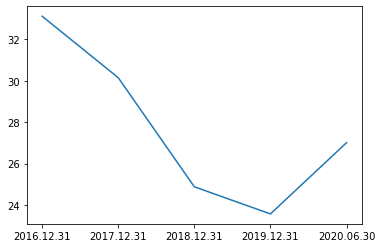

In [10]:
test = Finance_hangyung("피엔케이피부임상연구센타")
test.Financial_analysis()
test.Graph('총자본순이익율')

In [11]:
test.Financial_analysis()

,2016.12.31,2017.12.31,2018.12.31,2019.12.31,2020.06.30
주요재무비율,,,,,
수익성 비율,(%),,,,
총자본순이익율,33.12,30.15,24.88,23.57,27.01
자기자본순이익율,35.72,32.78,27.4,26.58,30.36
매출액법인세비용차감전순이익율,57.3,54.14,45.58,50.54,60.19
매출액순이익율,47.22,44.5,38.75,43.01,51.18
매출액영업이익율,54.91,51.54,45.61,45.41,55.92
금융비용/매출액비율,-,-,-,0.26,0.14
성장성 비율,(%),,,,
총자산증가율,42.82,23.5,30.08,58.55,12.98
